<a href="https://colab.research.google.com/github/maggiecrowner/DS3001-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DS 3001 Project

##Data Wrangling/EDA

In [1]:
! git clone https://github.com/maggiecrowner/DS3001-Project

Cloning into 'DS3001-Project'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 24), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 3.59 MiB | 6.06 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Wrangling**

In [3]:
df = pd.read_csv('/content/DS3001-Project/spotify_songs.csv', low_memory=False)

df = df.drop('track_id', axis=1)
df = df.drop('track_album_id', axis=1)
df = df.drop('playlist_id', axis=1)
df = df.drop('playlist_name', axis=1)
df = df.drop('playlist_genre', axis=1)
df = df.drop('playlist_subgenre', axis=1)
df = df.drop('track_album_name', axis=1)
df = pd.DataFrame.dropna(df, axis=0)

df.loc[:,'mode'] = df['mode'].replace(to_replace=0, value='Minor')
df.loc[:,'mode'] = df['mode'].replace(to_replace=1, value='Major')

df['year'] = df['track_album_release_date'].str[:4]
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df[df['year'] >= 2000]
df.loc[:, 'year'] = df['year'].astype(str)

df['month'] = df['track_album_release_date'].str[5:7]
df = df.drop('track_album_release_date', axis=1)

month_mapping = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'}
df.loc[:, 'month'] = df['month'].map(month_mapping)

key_mapping = {
    0: 'C',
    1: 'C_Sharp',
    2: 'D',
    3: 'D_Sharp',
    4: 'E',
    5: 'F',
    6: 'F_Sharp',
    7: 'G',
    8: 'G_Sharp',
    9: 'A',
    10: 'A_Sharp',
    11: 'B'}
df.loc[:, 'key'] = df['key'].map(key_mapping)

display(df)

,track_name,track_artist,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,month
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,0.748,0.916,F_Sharp,-2.634,Major,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,June
1,Memories - Dillon Francis Remix,Maroon 5,67,0.726,0.815,B,-4.969,Major,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,December
2,All the Time - Don Diablo Remix,Zara Larsson,70,0.675,0.931,C_Sharp,-3.432,Minor,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,July
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,0.718,0.930,G,-3.778,Major,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019,July
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,0.650,0.833,C_Sharp,-4.672,Major,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,42,0.428,0.922,D,-1.814,Major,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014,April
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,0.522,0.786,C,-4.462,Major,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013,March
32830,Sweet Surrender - Radio Edit,Starkillers,14,0.529,0.821,F_Sharp,-4.899,Minor,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,April
32831,Only For You - Maor Levi Remix,Mat Zo,15,0.626,0.888,D,-3.361,Major,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,January


**EDA**

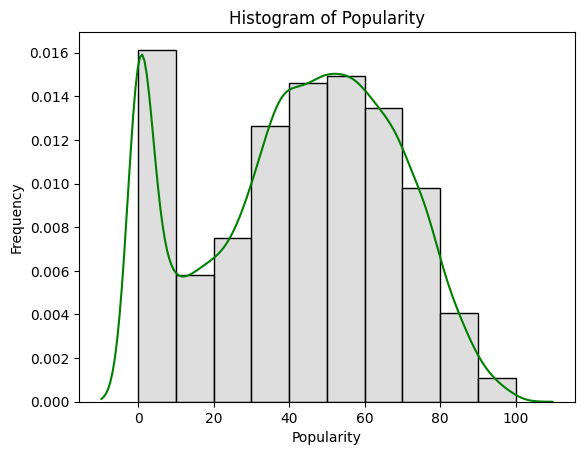

In [4]:
sns.histplot(df["track_popularity"], bins=10, color='lightgray', stat='density')
sns.kdeplot(df["track_popularity"], color='green')
plt.title('Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

A histogram of our likely response variable, which is the popularity of the song.

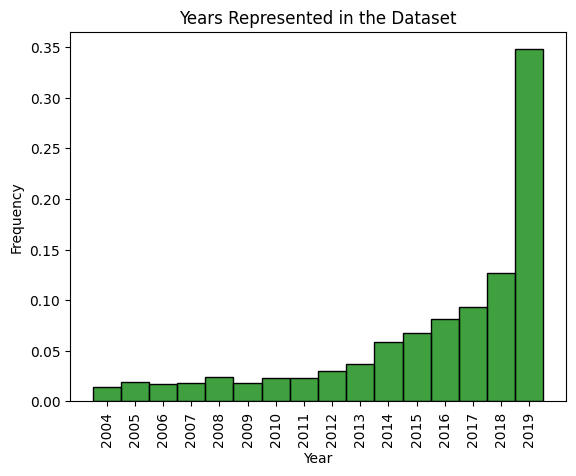

In [5]:
df['year'] = pd.Categorical(df['year'], ['2004', '2005', '2006', '2007', '2008', '2009',
                                         '2010', '2011', '2012', '2013', '2014', '2015',
                                         '2016', '2017', '2018', '2019'])
sns.histplot(df["year"], color='green', stat='density')
plt.title('Years Represented in the Dataset')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

A histogram of our years variable. Our dataset includes data from 2004-2019, with more data in more recent years.

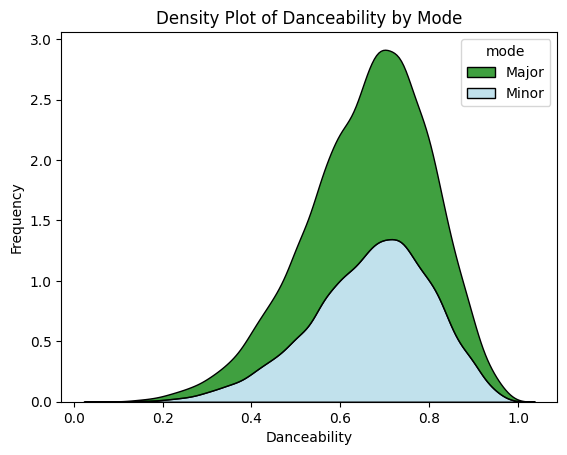

In [6]:
sns.set_palette(['green', 'lightblue'])
sns.kdeplot(df, x='danceability', hue='mode', multiple='stack')
plt.title('Density Plot of Danceability by Mode')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

A stacked density plot of danceability by whether the song is in a major or minor key. As you can see, there are more major songs in general, but the distribution of danceability is essentially the same for both modes.

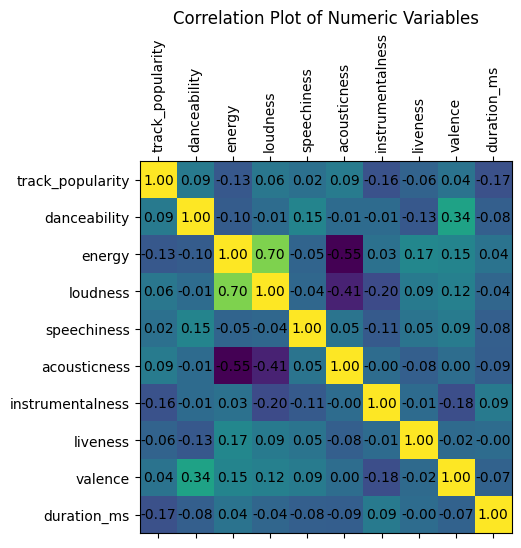

In [7]:
for_corr = df[['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
               'valence', 'duration_ms']]
plt.matshow(for_corr.corr())
plt.xticks(range(len(for_corr.columns)), for_corr.columns, rotation=90)
plt.yticks(range(len(for_corr.columns)), for_corr.columns)
corr_matrix = for_corr.corr()
for (i, j), val in np.ndenumerate(corr_matrix.values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
plt.title('Correlation Plot of Numeric Variables')
plt.show()

A correlation plot of all of the numerical variables in our dataset. No singular variable is highly correlated with popularity, which should be interesting to see the effects of once we start modeling.

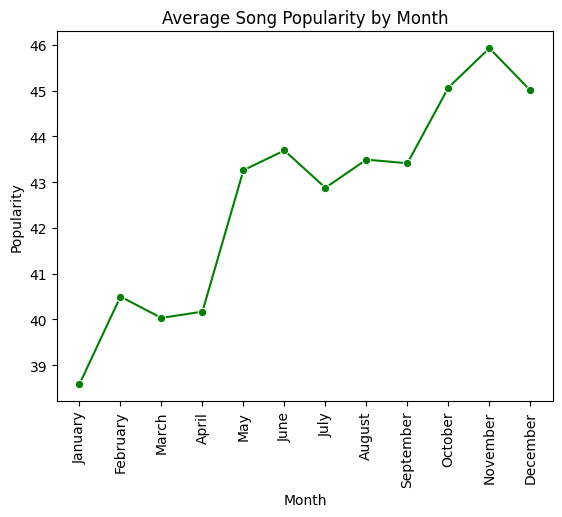

In [8]:
month_popularity = df.groupby('month')['track_popularity'].mean().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_popularity['month'] = pd.Categorical(month_popularity['month'], categories=month_order, ordered=True)
month_popularity = month_popularity.sort_values('month')

sns.lineplot(x='month', y='track_popularity', data=month_popularity, marker='o')
plt.title('Average Song Popularity by Month')
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

A line plot that shows the average song popularity by the month it was released. This shows a huge trend in songs released later in the year being more popular.

##Results

In [9]:
df = df.drop('track_name', axis=1)
df = df.drop('track_artist', axis=1)
df_encoded = pd.get_dummies(df, columns=['mode', 'month', 'key'])
df_encoded

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_B,key_C,key_C_Sharp,key_D,key_D_Sharp,key_E,key_F,key_F_Sharp,key_G,key_G_Sharp
0,66,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,...,False,False,False,False,False,False,False,True,False,False
1,67,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,...,True,False,False,False,False,False,False,False,False,False
2,70,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,...,False,False,True,False,False,False,False,False,False,False
3,60,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,...,False,False,False,False,False,False,False,False,True,False
4,69,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,...,False,False,False,True,False,False,False,False,False,False
32829,20,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,...,False,True,False,False,False,False,False,False,False,False
32830,14,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,...,False,False,False,False,False,False,False,True,False,False
32831,15,0.626,0.888,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,...,False,False,False,True,False,False,False,False,False,False


In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

PCA

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded.iloc[:, 1:])

pca = PCA()
pca.fit(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual Variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative Variance', color='red')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.legend(loc='best')
plt.grid()
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Random Forest Model

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X = df_encoded.drop(columns=['track_popularity'])
y = df_encoded['track_popularity']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)

In [16]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [17]:
y_pred = rf_model.predict(X_test)

In [24]:
#from sklearn import tree
#tree.plot_tree(rf_model,filled=True)
#plt.show()

Cross Validation

In [19]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [29]:

#param_grid = {'n_estimators': [50, 100, 150],
#              'max_depth': [None,3, 5, 8]}

#grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='r2')
#grid_search.fit(X, y)

#print("Best Parameters:", grid_search.best_params_)
#print("Best Cross-Validation R²:", grid_search.best_score_)

In [21]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='r2')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R2:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Cross-Validation R2: 0.1530270203381641


Refitting

In [22]:
rf_model_best = RandomForestRegressor(
    n_estimators=150,
    max_depth=10,
    max_features = "sqrt",
    min_samples_leaf = 1,
    min_samples_split = 5,
    random_state=1
)

rf_model_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=5,
                      n_estimators=150, random_state=1)

In [23]:
# testing statistics

#y_hat_best = rf_model_best.predict(X_test)

#from sklearn.model_selection import train_test_split
#TSS = np.sum( (y_test - y_train.mean())**2 )
#N_test = len(y_test)

#SSE = np.sum( (y_test-y_hat_best)**2 )
#MSE = (1/N_test)*np.sum( (y_test-y_hat_best)**2 )
#RMSE = (SSE/N_test)**(1/2)
#R2 = 1 - SSE/TSS

2691580.4134412697
479.35537193967406
21.89418580216387
0.22895905187880383


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on training and testing datasets
y_train_pred = rf_model_best.predict(X_train)
y_test_pred = rf_model_best.predict(X_test)

# Calculate statistics for training data
SSE_train = sum((y_train - y_train_pred)**2)
MSE_train = mean_squared_error(y_train, y_train_pred)
RMSE_train = MSE_train**0.5
R2_train = r2_score(y_train, y_train_pred)

# Calculate statistics for testing data
SSE_test = sum((y_test - y_test_pred)**2)
MSE_test = mean_squared_error(y_test, y_test_pred)
RMSE_test = MSE_test**0.5
R2_test = r2_score(y_test, y_test_pred)

# training data
print("Training Statistics:")
print("SSE (Train):", SSE_train)
print("MSE (Train):", MSE_train)
print("RMSE (Train):", RMSE_train)
print("R² (Train):", R2_train)

# testing data
print("\nTesting Statistics:")
print("SSE (Test):", SSE_test)
print("MSE (Test):", MSE_test)
print("RMSE (Test):", RMSE_test)
print("R² (Test):", R2_test)


Training Statistics:
SSE (Train): 9511320.585461762
MSE (Train): 423.5536420316059
RMSE (Train): 20.58041889835107
R² (Train): 0.3312918433696822

Testing Statistics:
SSE (Test): 2691580.4134412752
MSE (Test): 479.355371939674
RMSE (Test): 21.89418580216387
R² (Test): 0.22881251231567068


Statistics

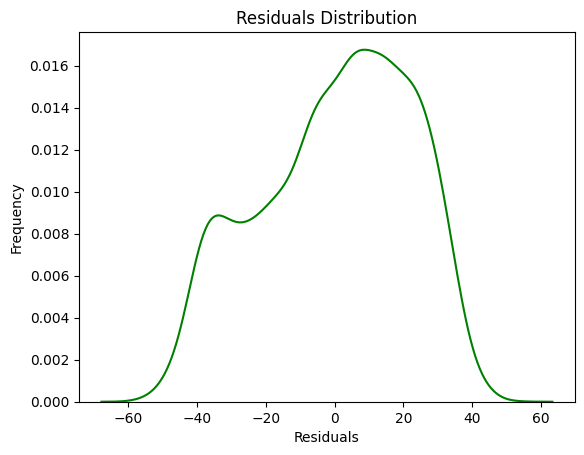

In [26]:

residuals = y_test - y_test_pred

# residuals plot
sns.kdeplot(residuals, color='green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


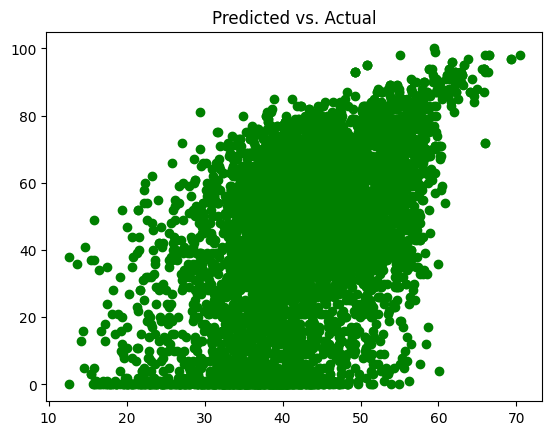

In [27]:
# true vs predicted
plt.scatter(x=y_test_pred, y=y_test)
plt.title('Predicted vs. Actual')
plt.show()


Importance

In [28]:
importances = rf_model_best.feature_importances_

features = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature  Importance
10              year    0.230455
5   instrumentalness    0.120171
9        duration_ms    0.088549
1             energy    0.077515
4       acousticness    0.076050
2           loudness    0.075124
8              tempo    0.057004
0       danceability    0.055981
7            valence    0.046806
3        speechiness    0.046758
6           liveness    0.042318
17     month_January    0.007849
23     month_October    0.004245
22    month_November    0.004012
11        mode_Major    0.003815
35             key_G    0.003426
12        mode_Minor    0.003420
36       key_G_Sharp    0.003388
26       key_A_Sharp    0.003297
30             key_D    0.003293
27             key_B    0.003109
29       key_C_Sharp    0.003069
34       key_F_Sharp    0.003012
28             key_C    0.003004
20       month_March    0.002974
13       month_April    0.002971
33             key_F    0.002896
15    month_December    0.002870
32             key_E    0.002844
24   month